# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import scipy
from scipy import integrate
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import sys
import os

import datetime
from datetime import timedelta


In [4]:
sys.path.append("/home/chase/codes/python_functions/")
import plotting as my_plot
import akta

import hplc_data_processing as hplc

# Multi-column study
## Arginine

In [5]:
file_path = f'./hplc_data/2022-07-19_full_vs_part_sat_arginine/'
data, sample_ids = hplc.load_hplc_data(file_path, shift_baseline_time=5)

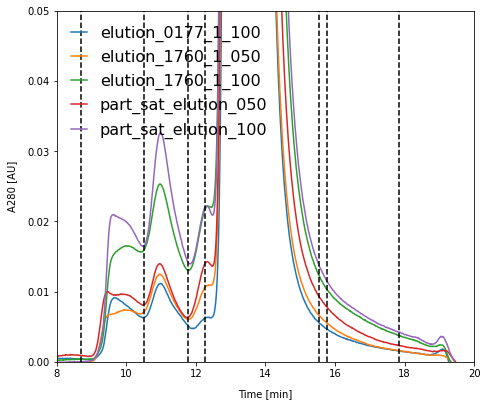

In [6]:
fig, ax = my_plot.instantiate_fig(xlabel='Time [min]', ylabel='A280 [AU]')

for s in sample_ids:
    d = data[s]
    df = d.df
    ax.plot(df.time_min, df.uv_280, label=d.sample)
    
my_plot.set_layout(fig, ax, legend=True, fontsize=16)
ax.set_xlim(8, 20)
ax.set_ylim(0, .05)

for t in [8.7, 10.517, 11.77, 12.25, 15.55, 15.76, 17.84, 21.45, 24.7]:
    ax.axvline(t, linestyle='--', color='black')

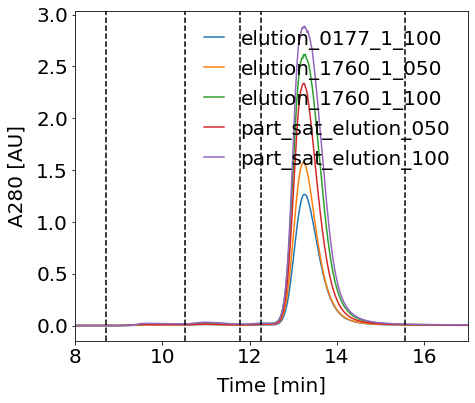

In [7]:
fig, ax = my_plot.instantiate_fig(xlabel='Time [min]', ylabel='A280 [AU]')

for s in sample_ids:
    d = data[s]
    df = d.df
    ax.plot(df.time_min, df.uv_280, label=d.sample)
    
my_plot.set_layout(fig, ax, legend=True)
ax.set_xlim(8, 17)
# ax.set_ylim(0, .05)

for t in [8.7, 10.517, 11.77, 12.25, 15.55]:
    ax.axvline(t, linestyle='--', color='black')

In [8]:
percentages = []
for s in [sample_ids[i] for i in [0, 1, 3]]:
    temp = [data[s].sample]
    for peak in ['large', 'small', 'lmw1']:
        temp.append(data[s].percentages_280[peak])
    percentages.append(temp)

df_per_arg = pd.DataFrame(percentages, columns=['inj_name', 'large', 'small', 'lmw1'])
df_per_arg['name'] = [r'177 $\mu$l', r'1760 $\mu$l', r'177 + 1760 $\mu$l']

In [9]:
df_per_arg

,inj_name,large,small,lmw1,name
0,elution_0177_1_100,0.993775,1.122170,0.612260,177 $\mu$l
1,elution_1760_1_050,0.800991,1.059292,0.567456,1760 $\mu$l
2,part_sat_elution_050,0.741507,0.758121,0.536877,177 + 1760 $\mu$l


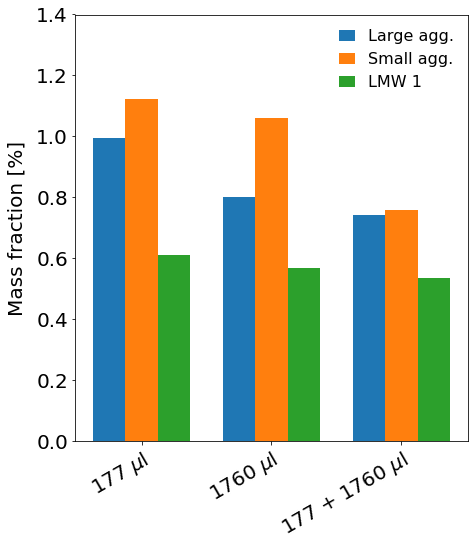

In [10]:
fig, ax = my_plot.instantiate_fig(x=7, y=8, ylabel='Mass fraction [%]')
ticks = ax.set_xticks(df_per_arg.index, df_per_arg.name, rotation=30, ha='right', rotation_mode='anchor')
width = 0.25
rects_1 = ax.bar(df_per_arg.index-width, df_per_arg.large, width=width, label='Large agg.')
rects_2 = ax.bar(df_per_arg.index,       df_per_arg.small, width=width, label='Small agg.')
rects_3 = ax.bar(df_per_arg.index+width, df_per_arg.lmw1, width=width, label='LMW 1')

ax.set_ylim(0, 1.4)
my_plot.set_layout(fig, ax, legend=True, fontsize=16)
# plt.savefig(f'./images/3_arginine.png', dpi=300, bbox_inches='tight')

## pH 10 wash

In [11]:
file_path = f'./hplc_data/2022-07-21_full_vs_part_sat_pH_10/'
data, sample_ids = hplc.load_hplc_data(file_path)

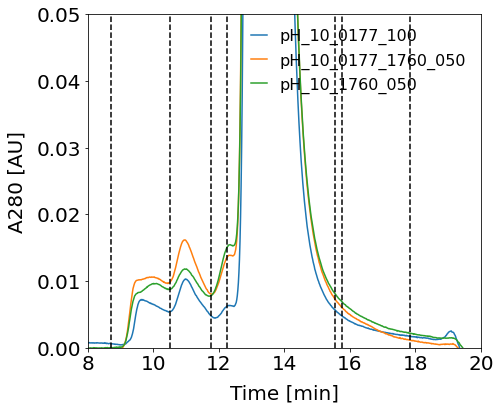

In [12]:
fig, ax = my_plot.instantiate_fig(xlabel='Time [min]', ylabel='A280 [AU]')

for s in sample_ids:
    d = data[s]
    df = d.df
    ax.plot(df.time_min, df.uv_280, label=d.sample)
    
my_plot.set_layout(fig, ax, legend=True, fontsize=16)
ax.set_xlim(8, 20)
ax.set_ylim(0, .05)

for t in [8.7, 10.517, 11.77, 12.25, 15.55, 15.76, 17.84, 21.45, 24.7]:
    ax.axvline(t, linestyle='--', color='black')

In [13]:
percentages = []
for s in [sample_ids[i] for i in [0, 2, 1]]:
    temp = [data[s].sample]
    for peak in ['large', 'small', 'lmw1']:
        temp.append(data[s].percentages_280[peak])
    percentages.append(temp)

df_per_pH = pd.DataFrame(percentages, columns=['inj_name', 'large', 'small', 'lmw1'])
df_per_pH['name'] = [r'177 $\mu$l', r'1760 $\mu$l', r'177 + 1760 $\mu$l']

In [14]:
df_per_pH

,inj_name,large,small,lmw1,name
0,pH_10_0177_100,0.738343,0.929488,0.572368,177 $\mu$l
1,pH_10_1760_050,0.769967,0.849099,0.564306,1760 $\mu$l
2,pH_10_0177_1760_050,0.884508,1.071048,0.436942,177 + 1760 $\mu$l


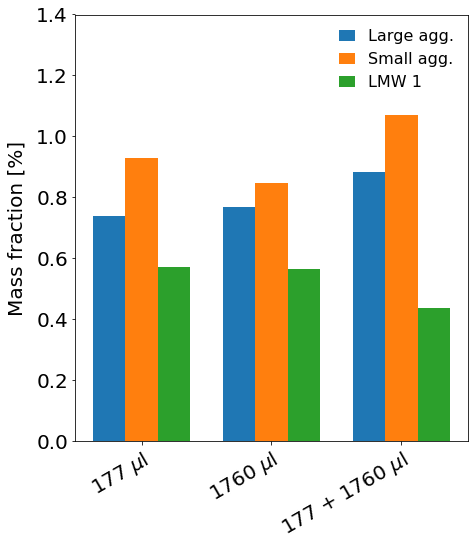

In [15]:
fig, ax = my_plot.instantiate_fig(x=7, y=8, ylabel='Mass fraction [%]')
ticks = ax.set_xticks(df_per_pH.index, df_per_pH.name, rotation=30, ha='right', rotation_mode='anchor')
width = 0.25
rects_1 = ax.bar(df_per_pH.index-width, df_per_pH.large, width=width, label='Large agg.')
rects_2 = ax.bar(df_per_pH.index,       df_per_pH.small, width=width, label='Small agg.')
rects_3 = ax.bar(df_per_pH.index+width, df_per_pH.lmw1, width=width, label='LMW 1')

ax.set_ylim(0, 1.4)
my_plot.set_layout(fig, ax, legend=True, fontsize=16)
# plt.savefig(f'./images/3_pH_10.png', dpi=300, bbox_inches='tight')

In [16]:
sample_ids

['pH_10_0177_100_20690', 'pH_10_0177_1760_050_20702', 'pH_10_1760_050_20696']

# Both

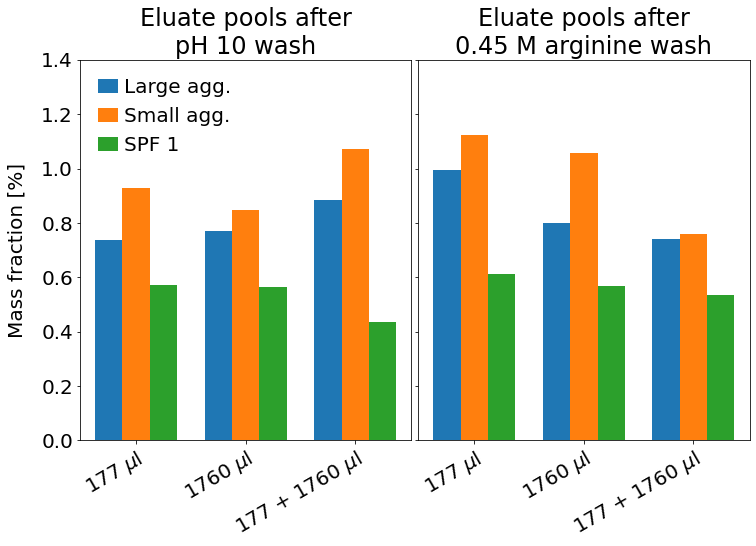

In [17]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(12, 7, forward=True)
plt.subplots_adjust(wspace=0.02)

ax[0].set_ylim(0, 1.4)
ylabel = ax[0].set_ylabel('Mass fraction [%]', labelpad=15)
for i in range(2):
    xlabel = ax[i].set_xticks(df_per_arg.index, df_per_arg.name, rotation=30, ha='right', rotation_mode='anchor')
    
t = ax[0].set_title('Eluate pools after\npH 10 wash')
t = ax[1].set_title('Eluate pools after\n0.45 M arginine wash')

width = 0.25
rects_1 = ax[0].bar(df_per_pH.index-width, df_per_pH.large, width=width, label='Large agg.')
rects_2 = ax[0].bar(df_per_pH.index,       df_per_pH.small, width=width, label='Small agg.')
rects_3 = ax[0].bar(df_per_pH.index+width, df_per_pH.lmw1, width=width, label='SPF 1')

rects_1 = ax[1].bar(df_per_arg.index-width, df_per_arg.large, width=width, label='Large agg.')
rects_2 = ax[1].bar(df_per_arg.index,       df_per_arg.small, width=width, label='Small agg.')
rects_3 = ax[1].bar(df_per_arg.index+width, df_per_arg.lmw1, width=width, label='SPF 1')

legend = ax[0].legend(frameon=False, handlelength=1, fontsize=20, handletextpad=0.3)

# plt.savefig('./images/3_pH_and_arginine.png', dpi=300, bbox_inches='tight')
plt.savefig('./images/3_pH_and_arginine.pdf', bbox_inches='tight')